In [1]:
from drivecycle import route, simplification, energy
import pandas as pd
from matplotlib import pyplot
from scipy import interpolate
import json
import numpy as np
import inspect


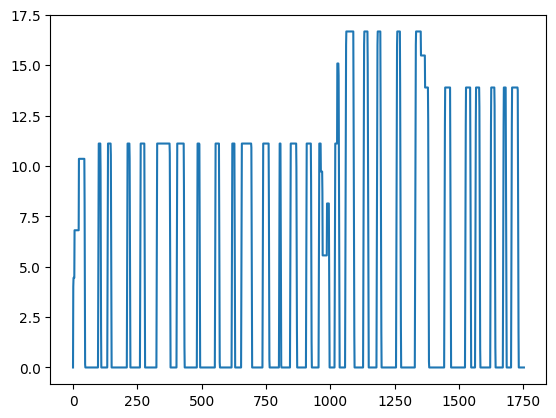

In [13]:
stop_params = {
    "bus_stop":60,
    "tertiary":120,
    "secondary":180,
}

route_id=10

df = pd.read_json(f"../tests/data/calgary-{route_id}-edges.json")
df1 = simplification.cluster_nodes(df,30)
tvq = route.sequential(df1,stop_params, step=2, a_max=2)

with open(f'../tests/data/calgary-{route_id}-elv.json', 'r') as f:
    elv = json.load(f)
    
e = energy.energy_model(tvq, elv, capacity=400, regen_ratio=0.5, m=10000, power_aux=5)
pyplot.plot(e[:,0], e[:,1])

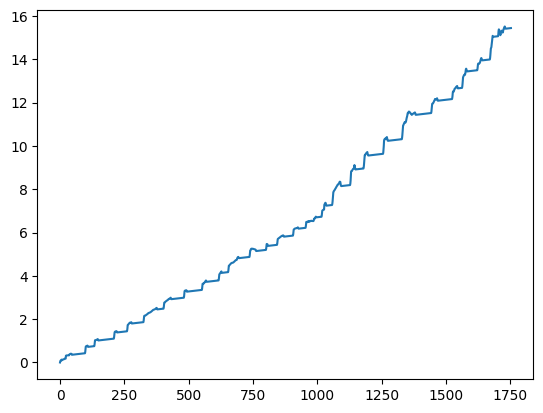

In [14]:
pyplot.plot(e[:,0], e[:,3])

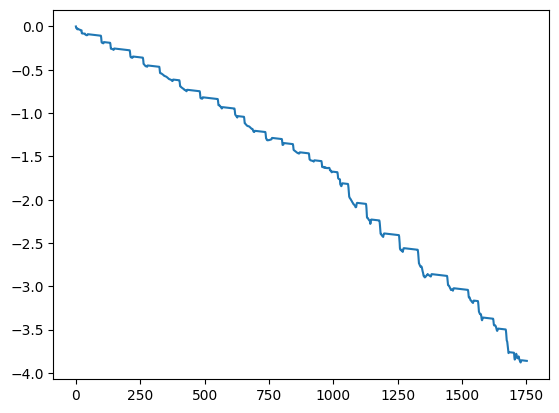

In [15]:
pyplot.plot(e[:,0], e[:,4])